In [ ]:
import warnings
warnings.filterwarnings('ignore')


import os
import numpy as np
import pandas as pd


import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             auc,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)


from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)


from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df2 = df.copy()

In [ ]:
column_values = df['bmi'].dropna()
sampled_values = np.random.choice(column_values, size=df['bmi'].isnull().sum(), replace=True)
df.loc[df['bmi'].isnull(), 'bmi'] = sampled_values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [ ]:
column_values = df['smoking_status'].dropna()
sampled_values = np.random.choice(column_values, size=df['smoking_status'].isnull().sum(), replace=True)
df.loc[df['smoking_status'].isnull(), 'smoking_status'] = sampled_values

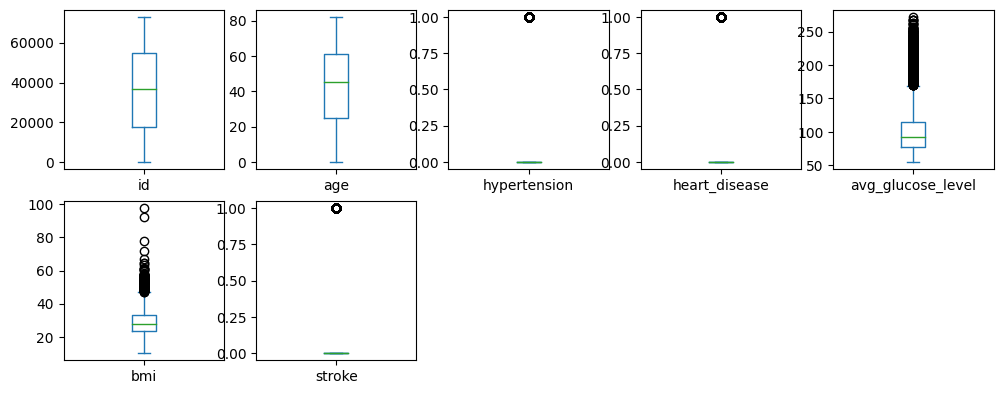

In [ ]:

ax_array = df.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))


In [ ]:
df['bmi'].max()

97.6

In [ ]:
print("outliers:" , df[(df['bmi'] >= 65)].count())

outliers: id                   5
gender               5
age                  5
hypertension         5
heart_disease        5
ever_married         5
work_type            5
Residence_type       5
avg_glucose_level    5
bmi                  5
smoking_status       5
stroke               5
dtype: int64


In [ ]:
df=df[(df['bmi'] < 60)]
df.shape

(5097, 12)

In [ ]:

print("outliers:" , df[(df['bmi'] >= 55)].count())

outliers: id                   25
gender               25
age                  25
hypertension         25
heart_disease        25
ever_married         25
work_type            25
Residence_type       25
avg_glucose_level    25
bmi                  25
smoking_status       25
stroke               25
dtype: int64


In [ ]:
df=df[(df['bmi'] <= 55)]

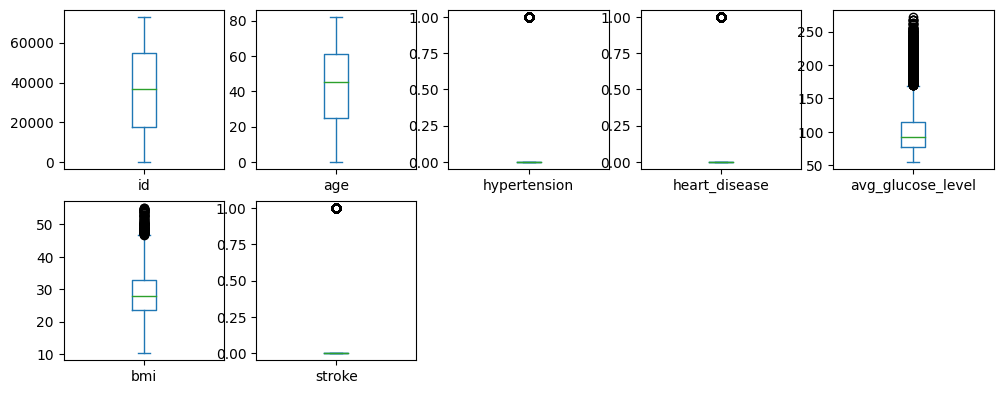

In [ ]:

ax_array = df.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))


In [ ]:

df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.5,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,22.4,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:

df['gender'].value_counts()

Female    2970
Male      2103
Other        1
Name: gender, dtype: int64

In [ ]:
df=df[(df['gender'] != 'Other')]

In [ ]:
df['gender'].value_counts()

Female    2970
Male      2103
Name: gender, dtype: int64

In [ ]:
df['work_type'].value_counts()

Private          2897
Self-employed     814
children          687
Govt_job          653
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df["gender"]=df["gender"].str.replace("Male","1")
df["gender"]=df["gender"].str.replace("Female","0")
df["gender"]=df["gender"].astype("int32")

In [ ]:
df['ever_married'].value_counts()

Yes    3323
No     1750
Name: ever_married, dtype: int64

In [ ]:
df["ever_married"]=df["ever_married"].str.replace("Yes","1")
df["ever_married"]=df["ever_married"].str.replace("No","0")
df["ever_married"]=df["ever_married"].astype("int32")

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.5,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,Urban,83.75,22.4,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


from matplotlib import pyplot as plt
_df_0['gender'].plot(kind='hist', bins=20, title='gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['heart_disease'].plot(kind='hist', bins=20, title='heart_disease')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('work_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('smoking_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='gender', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='age', y='hypertension', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='hypertension', y='heart_disease', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='heart_disease', y='ever_married', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['gender'].plot(kind='line', figsize=(8, 4), title='gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['hypertension'].plot(kind='line', figsize=(8, 4), title='hypertension')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['heart_disease'].plot(kind='line', figsize=(8, 4), title='heart_disease')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoking_status'].value_counts()
    for x_label, grp in _df_14.groupby('work_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('work_type')
_ = plt.ylabel('smoking_status')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['work_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='gender', y='work_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['smoking_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='gender', y='smoking_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['work_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='age', y='work_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['smoking_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='age', y='smoking_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df["Residence_type"]=df["Residence_type"].str.replace("Rural","0")
df["Residence_type"]=df["Residence_type"].str.replace("Urban","1")
df["Residence_type"]=df["Residence_type"].astype("int32")

In [ ]:
df.drop(['id'],axis=1,inplace = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import RidgeCV
le = preprocessing.LabelEncoder()

In [ ]:
data_0 = df[df.iloc[:,-1]==0]
data_1 = df[df.iloc[:,-1]==1]

df['stroke'].value_counts()

0    4827
1     246
Name: stroke, dtype: int64

In [ ]:
from sklearn.utils import resample

data_1 = resample(data_1,replace=True , n_samples=data_0.shape[0] , random_state=123 )

In [ ]:

df = np.concatenate((data_0,data_1))

df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,children,0,95.12,18.0,formerly smoked,0
1,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0
2,0,8.0,0,0,0,Private,1,110.89,17.6,never smoked,0
3,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,0,Never_worked,0,161.28,19.1,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
9649,0,55.0,0,0,1,Self-employed,0,92.98,25.6,never smoked,1
9650,0,61.0,0,1,1,Govt_job,0,120.46,36.8,smokes,1
9651,0,70.0,0,0,1,Private,1,221.58,47.5,never smoked,1
9652,1,81.0,0,0,1,Self-employed,0,91.54,31.4,never smoked,1


In [ ]:
df_resampled = pd.get_dummies(df , columns =  ['gender','ever_married','work_type','Residence_type','smoking_status'] ,drop_first=True )

In [ ]:
df_resampled

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,ever_married_1,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_1,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,1,0,0,0
1,58.0,1,0,87.96,39.2,0,1,1,0,1,0,0,1,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,1,0,0,1,1,0
3,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,0,0
4,14.0,0,0,161.28,19.1,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,55.0,0,0,92.98,25.6,1,0,1,0,0,1,0,0,1,0
9650,61.0,0,1,120.46,36.8,1,0,1,0,0,0,0,0,0,1
9651,70.0,0,0,221.58,47.5,1,0,1,0,1,0,0,1,1,0
9652,81.0,0,0,91.54,31.4,1,1,1,0,0,1,0,0,1,0


In [ ]:
x1 = df_resampled.drop('stroke', axis = 1)
y1 = pd.to_numeric( df_resampled['stroke'])

In [ ]:
scaler = StandardScaler()

x_resampled = scaler.fit_transform(x1)

In [ ]:
x_train_resampled , x_test_resampled , y_train_resampled , y_test_resampled = train_test_split(x_resampled,y1,test_size = .20)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier

from sklearn.metrics import roc_curve, roc_auc_score

XGBoost Accuracy: 0.9772138788192646
XGBoost Confusion Matrix:
[[921  44]
 [  0 966]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       965
           1       0.96      1.00      0.98       966

    accuracy                           0.98      1931
   macro avg       0.98      0.98      0.98      1931
weighted avg       0.98      0.98      0.98      1931

Training Accuracy: 1.0
Testing Accuracy: 0.9772138788192646


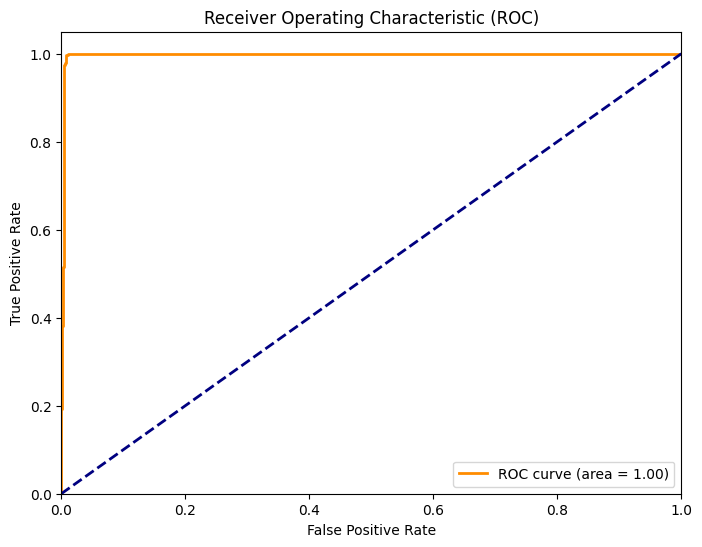

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
}


grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)

grid_search_xgb.fit(x_train_resampled, y_train_resampled)


best_params_xgb = grid_search_xgb.best_params_

best_xgb_model = XGBClassifier(random_state=42, **best_params_xgb)
best_xgb_model.fit(x_train_resampled, y_train_resampled)


y_pred_xgb = best_xgb_model.predict(x_test_resampled)


accuracy_xgb = accuracy_score(y_test_resampled, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_resampled, y_pred_xgb)
class_report_xgb = classification_report(y_test_resampled, y_pred_xgb)


print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("XGBoost Classification Report:")
print(class_report_xgb)

y_train_pred = best_xgb_model.predict(x_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

test_accuracy = accuracy_score(y_test_resampled, y_pred_xgb)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

roc_auc = roc_auc_score(y_test_resampled, best_xgb_model.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_xgb_model.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()




Accuracy on Test Set: 0.7809425168306577 

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       965
           1       0.76      0.83      0.79       966

    accuracy                           0.78      1931
   macro avg       0.78      0.78      0.78      1931
weighted avg       0.78      0.78      0.78      1931

[[709 256]
 [167 799]]


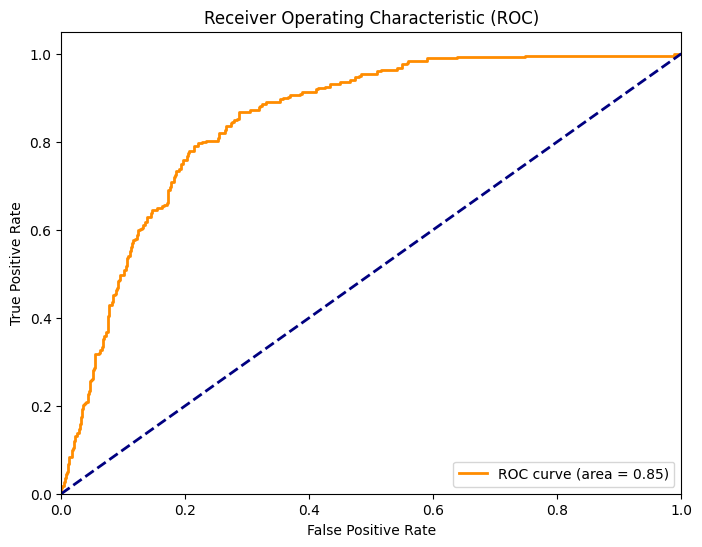

In [ ]:
#logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_classifier = LogisticRegression()

grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5)

grid_search.fit(x_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_logistic_classifier = grid_search.best_estimator_

y_pred_Lg = best_logistic_classifier.predict(x_test_resampled)

accuracy = accuracy_score(y_test_resampled, y_pred_Lg)
print("Accuracy on Test Set:", accuracy,"\n")
print("Classification Report:\n", classification_report(y_test_resampled, y_pred_Lg))

conf_matrix_Lg = confusion_matrix(y_test_resampled, y_pred_Lg)
print(conf_matrix_Lg)


roc_auc = roc_auc_score(y_test_resampled, best_logistic_classifier.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_logistic_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy on Test Set: 0.9823925427239772

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       965
           1       0.97      1.00      0.98       966

    accuracy                           0.98      1931
   macro avg       0.98      0.98      0.98      1931
weighted avg       0.98      0.98      0.98      1931

[[931  34]
 [  0 966]]


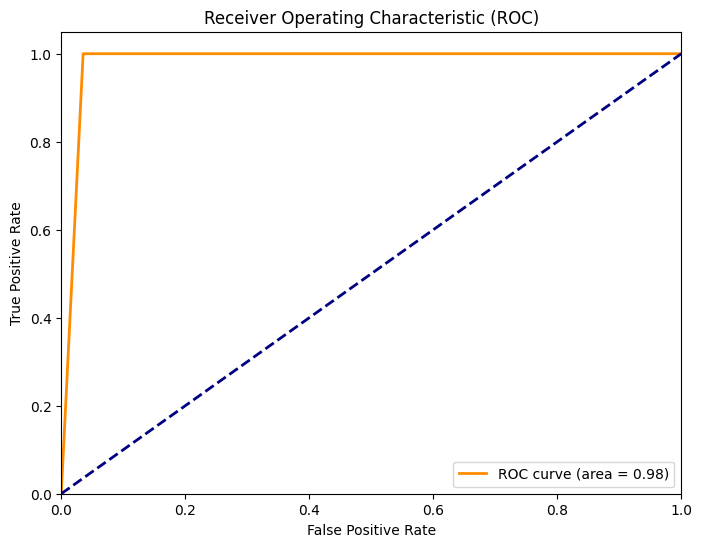

In [ ]:
#Decission Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

grid_search.fit(x_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

y_pred_dt = best_dt_classifier.predict(x_test_resampled)

accuracy = accuracy_score(y_test_resampled, y_pred_dt)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_dt))



conf_matrix_dt = confusion_matrix(y_test_resampled, y_pred_dt)
print(conf_matrix_dt)

roc_auc = roc_auc_score(y_test_resampled, best_dt_classifier.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_dt_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy on Test Set: 0.9513205592957017

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       965
           1       0.91      1.00      0.95       966

    accuracy                           0.95      1931
   macro avg       0.96      0.95      0.95      1931
weighted avg       0.96      0.95      0.95      1931

[[871  94]
 [  0 966]]


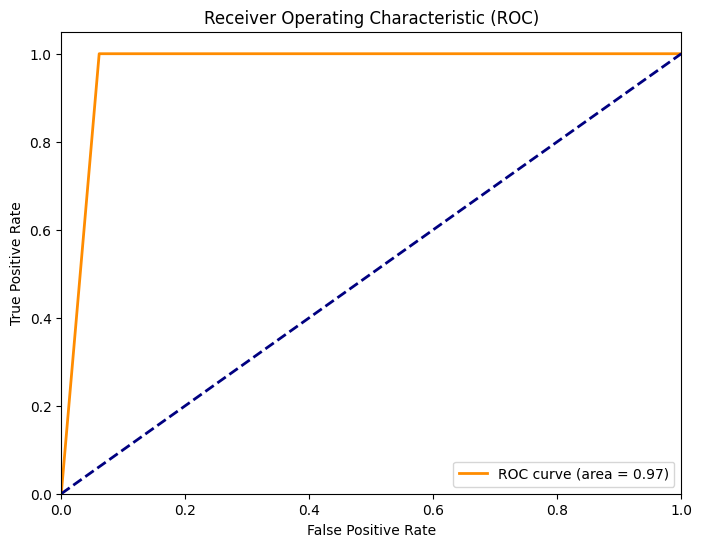

In [ ]:
#KNN
param_grid = {
    'n_neighbors': [4, 6, 8, 10, 12],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

grid_search.fit(x_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

y_pred_knn = best_knn_classifier.predict(x_test_resampled)

accuracy = accuracy_score(y_test_resampled, y_pred_knn)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_knn))


conf_matrix_knn = confusion_matrix(y_test_resampled, y_pred_knn)
print(conf_matrix_knn)

roc_auc = roc_auc_score(y_test_resampled, best_knn_classifier.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_knn_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()